## H1N1 PREDICTIVE ANALYSIS: MACHINE LEARNING FUNDAMENTALS 

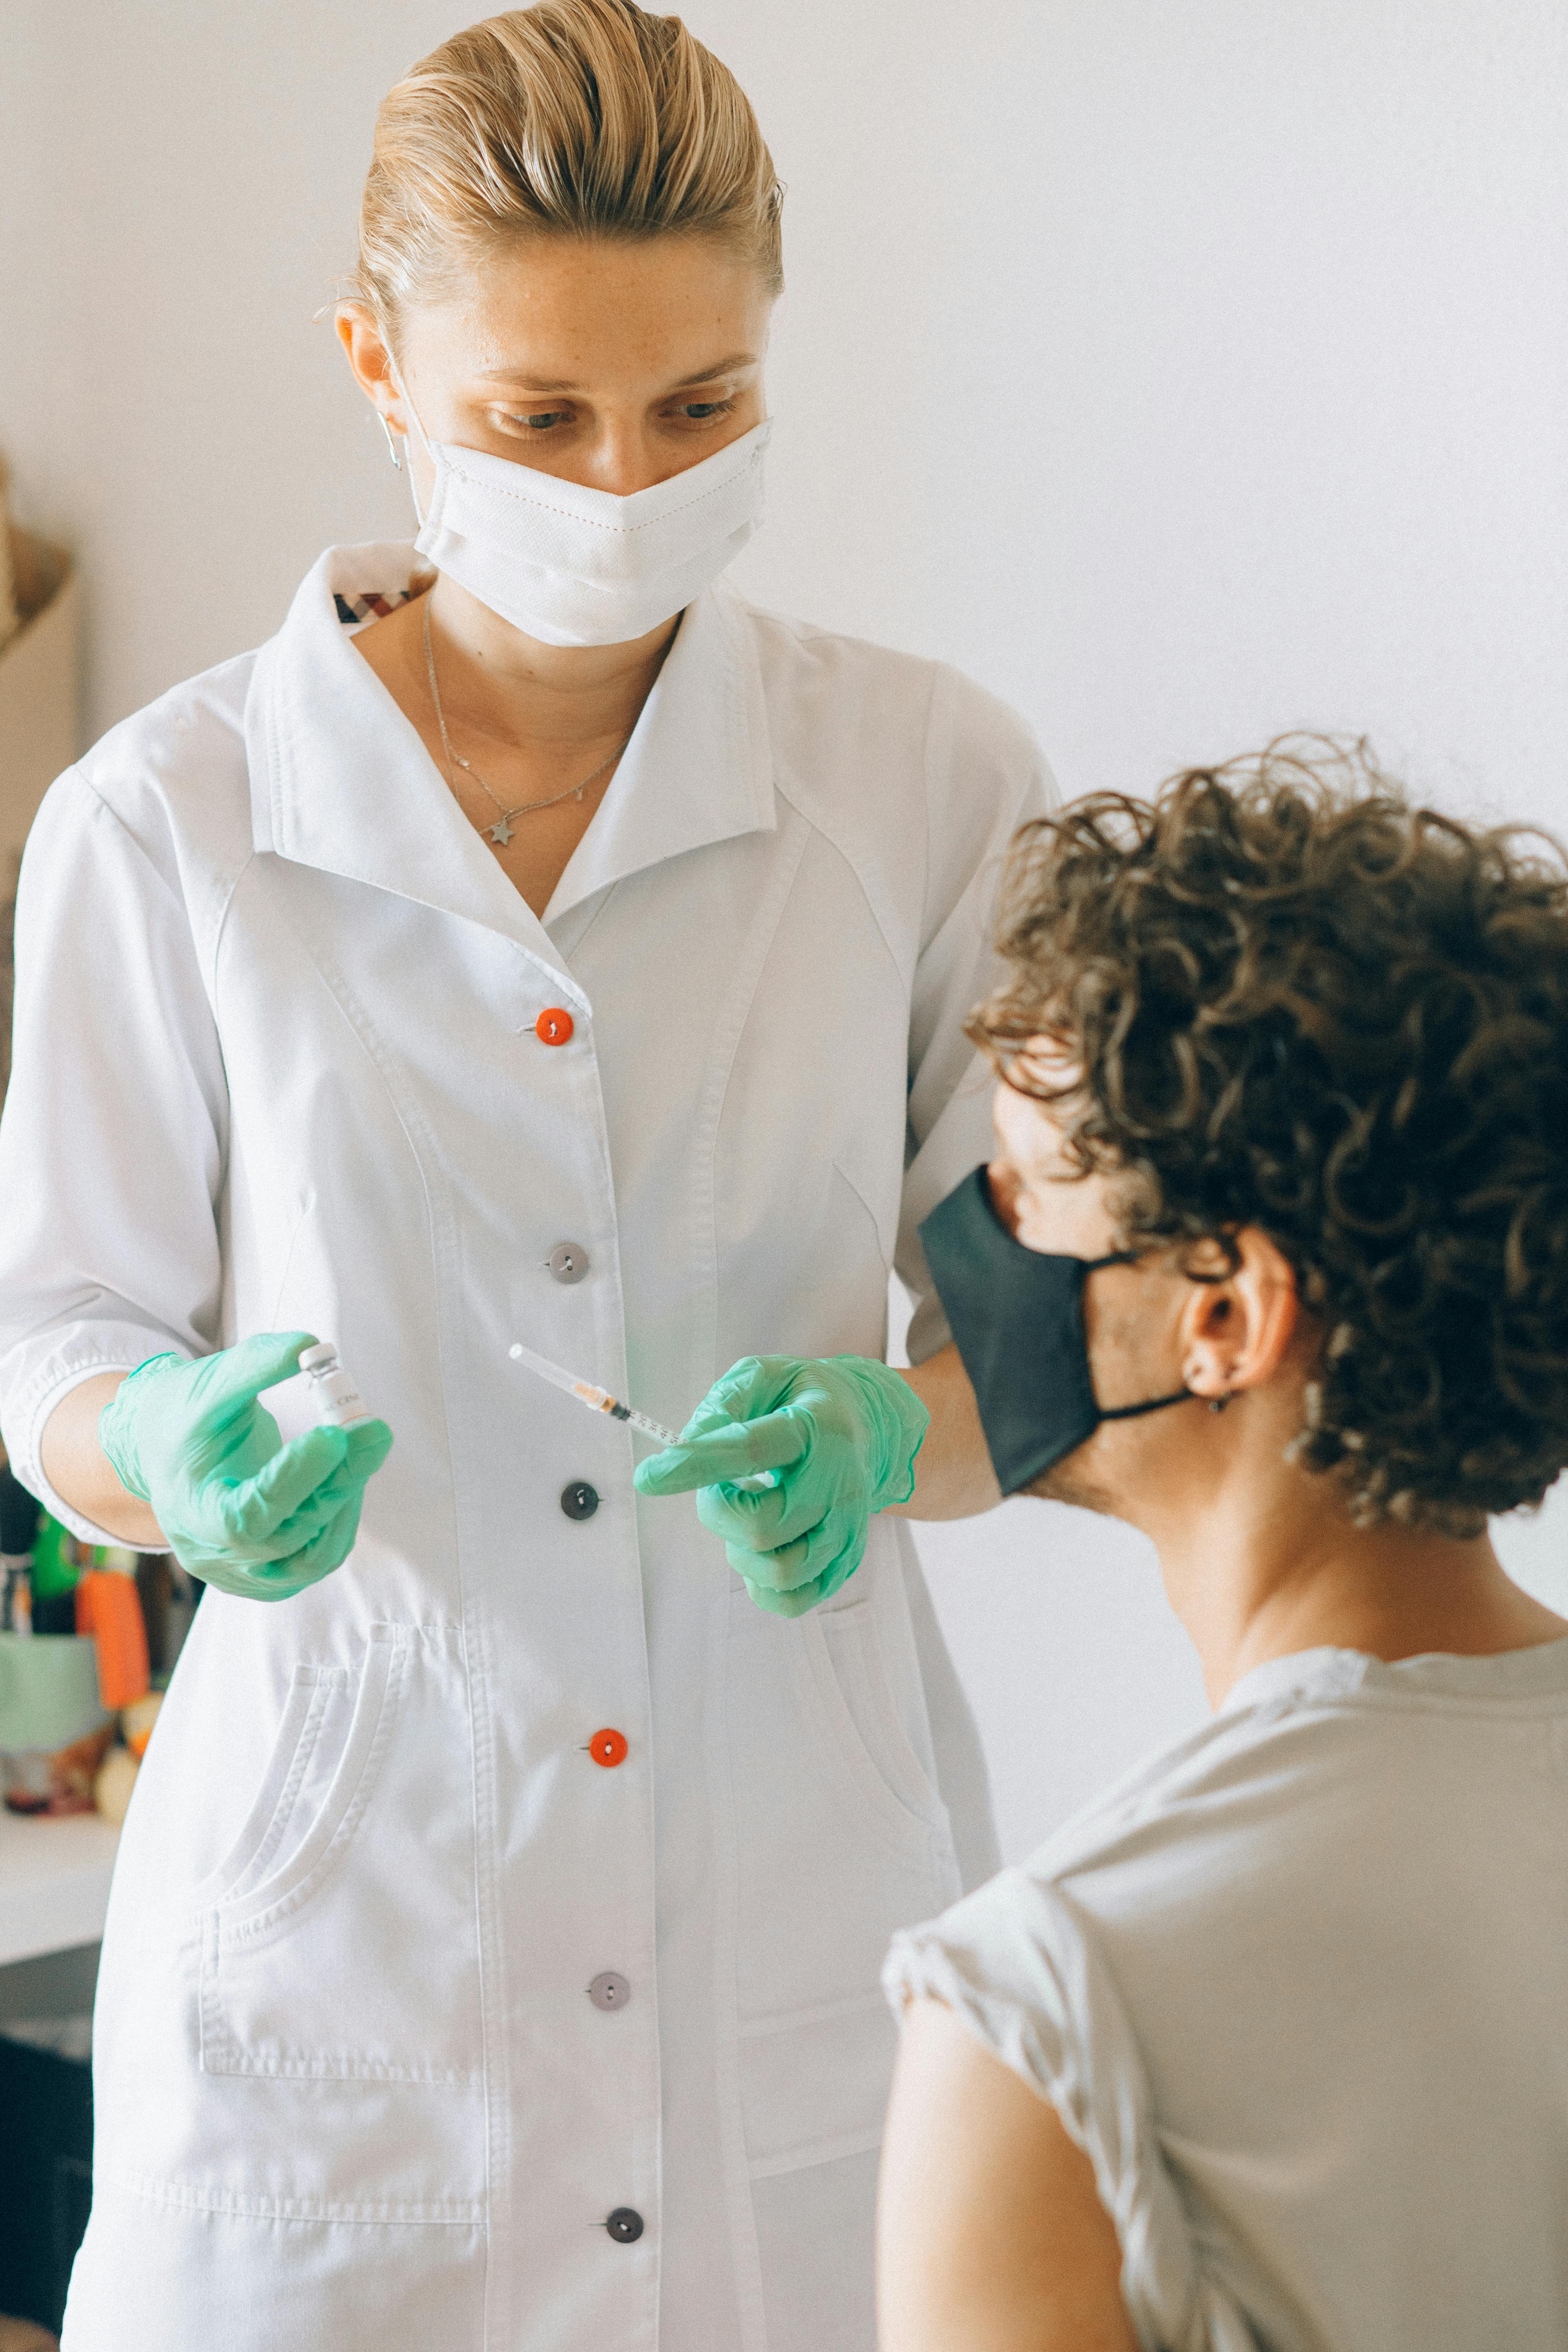

## BUSINESS UNDERSTANDING

OVERVIEW

The 2009 H1N1 flu pandemic highlighted the importance of effective vaccination campaigns in controlling the spread of infectious diseases. Public health officials have long recognized the need to understand the factors that influence vaccination rates, such as individual demographics, opinions, and health behaviors. By leveraging data from the National 2009 H1N1 Flu Survey, we aim to provide insights that can guide public health efforts to optimize vaccine outreach and uptake.

PROBLEM STATEMENT

The challenge is to predict whether individuals received the H1N1 flu vaccine or the seasonal flu vaccine based on their background, health behaviors, and opinions. This process is challenging especially because we have two target variables. This binary classification problem will focus on predicting people who received H1N1 flu vaccine using the available datasets. Insights derived from this analysis can enhance our understanding of vaccination drivers and barriers.

OBJECTIVES 

1.	Predictive Modeling: Develop a robust machine learning model to predict whether individuals received the H1N1 vaccine based on their demographic, behavioral, and opinion-based features.
2.	Insight Generation: Identify key factors that influence vaccination decisions and their relative importance in prediction.
3.	Public Health Guidance: Provide actionable recommendations to public health authorities for designing effective vaccination campaigns by understanding vaccination behaviors.
4.	Data-driven Strategies: Facilitate the design of targeted interventions for groups with low vaccination rates to improve uptake in future public health efforts.


SUCCESS CRITERIA

1.	Model Performance:
o	Achieve a high accuracy, F1-score, or AUC-ROC score for the predictive model to ensure reliable predictions.
2.	Feature Importance:
o	Identify and communicate the most influential factors affecting vaccination decisions.
3.	Public Health Insights:
o	Translate model findings into actionable strategies that public health officials can implement in real-world vaccination campaigns.
4.	Replicability:
o	Ensure the methodology is replicable and adaptable for other datasets or vaccination efforts beyond H1N1.
5.	Stakeholder Utility:
o	Provide clear and concise recommendations to public health stakeholders that align with the dataset's findings and analysis.


## DATA UNDERSTANDING

Importing the necessary libraries

In [1]:
#import the necessary Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
# Loading the dataset
df = pd.read_csv("H1N1_Flu_Vaccines.csv", index_col = 0)

In [3]:
df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   
...                             ...                   ...   
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   
...                              ...                          ...   
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   
...                                ...                    ...   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    NaN   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                           NaN  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   
...

In [4]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [5]:
df.shape

(26707, 37)

In [6]:
df.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

# DATA PREPARATION

# Checking for Missing Values 

In [7]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

There are several missing values in the dataset which require imputing before the next stages

# Checking for Duplicated Records

In [8]:
df.duplicated().sum()

0

There are no duplicate records

# Checking the Datatypes of the Columns 


The dataset has a mixture of both numerical and categorical variables which require preparation before modelling

In [9]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns=df.select_dtypes(include='object').columns

# Handling the Missing values for the Numerical Data

Let's impute the  missing values in the numerical columns using the mean. The mean is a good strategy because it is not easily affected by Outliers. 

In [10]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer 
mean_imputer = SimpleImputer(strategy='mean')

# Use the imputer for the Numerical Columns 
df[numerical_columns] = mean_imputer.fit_transform(df[numerical_columns])


In [11]:
df.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

The dataset still contains missing values in the categorical columns.

# Handling Missing Values for the Categorical Columns 

Let's impute the missing values with the "Unknown" Placeholder

In [12]:
unknown_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

# Apply the imputer to the categorical columns
df[categorical_columns] = unknown_imputer.fit_transform(df[categorical_columns])


In [13]:
# confirming that all the missing values have been replaced 
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

The dataset has 0 missing values

## checking the unique values in the categorical columns to initiate encoding

In [14]:
unique_values = {col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}


In [15]:
unique_values

{'age_group': 5,
 'education': 5,
 'race': 4,
 'sex': 2,
 'income_poverty': 4,
 'marital_status': 3,
 'rent_or_own': 3,
 'employment_status': 4,
 'hhs_geo_region': 10,
 'census_msa': 3,
 'employment_industry': 22,
 'employment_occupation': 24}

## DATA PREPROCESSING

## Defining the Independent Variables and the Target Variables

The aim of this project is to predict whether people got H1N1 and seasonal flu vaccines using the independent variables available

In [16]:
relevant_columns = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
    'behavioral_face_mask', 'doctor_recc_h1n1', 'chronic_med_condition',
    'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'income_poverty',
    'sex', 'marital_status', 'race', 'health_insurance', 'child_under_6_months',
    'behavioral_wash_hands', 'behavioral_avoidance', 'behavioral_large_gatherings',
    'h1n1_vaccine'
]
df_relevant = df[relevant_columns]

# Checking the correlation between the independent features in the dataset

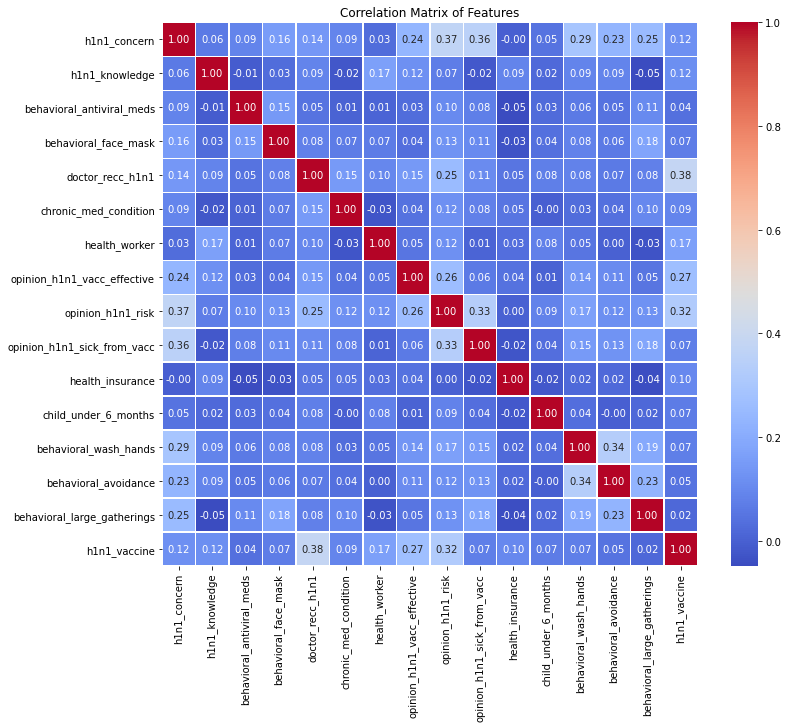

Top 10 Most Correlated Feature Pairs:
doctor_recc_h1n1             h1n1_vaccine                   0.384662
h1n1_vaccine                 doctor_recc_h1n1               0.384662
h1n1_concern                 opinion_h1n1_risk              0.372900
opinion_h1n1_risk            h1n1_concern                   0.372900
h1n1_concern                 opinion_h1n1_sick_from_vacc    0.355981
opinion_h1n1_sick_from_vacc  h1n1_concern                   0.355981
behavioral_avoidance         behavioral_wash_hands          0.336248
behavioral_wash_hands        behavioral_avoidance           0.336248
opinion_h1n1_risk            opinion_h1n1_sick_from_vacc    0.334481
opinion_h1n1_sick_from_vacc  opinion_h1n1_risk              0.334481
dtype: float64


In [17]:
# Creating the Correlation Matrix
correlation_matrix = df_relevant.corr()

# Plotting an heatmap to show the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]

top_10_corr_pairs = correlation_pairs.head(10)
print("Top 10 Most Correlated Feature Pairs:")
print(top_10_corr_pairs)


The above heatmap shows how features are correlated with each other. This will allow in removing the most correlated features to avoid multicollinearity of features during modelling. 

In [18]:
# Dropping the most correlated features in the dataframe to avoid multicollinearity of features during modelling
features_to_drop = [
    'doctor_recc_h1n1',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'behavioral_avoidance'
]

df_final = df_relevant.drop(columns=features_to_drop)





In [19]:
# Checking the final dataframe for Modelling
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_face_mask         26707 non-null  float64
 4   chronic_med_condition        26707 non-null  float64
 5   health_worker                26707 non-null  float64
 6   opinion_h1n1_vacc_effective  26707 non-null  float64
 7   age_group                    26707 non-null  object 
 8   education                    26707 non-null  object 
 9   income_poverty               26707 non-null  object 
 10  sex                          26707 non-null  object 
 11  marital_status               26707 non-null  object 
 12  race                         26707 non-null  object 
 13  health_insurance

In [20]:
# Checking the categorical columns to fit the machine learning requirements
categorical_columns = df_final.select_dtypes(include='object').columns

In [21]:
categorical_columns

Index(['age_group', 'education', 'income_poverty', 'sex', 'marital_status',
       'race'],
      dtype='object')

 # Encoding the categorical columns using the OneHotEncoder
 

Using the OneHotEncoder from sklearn.preprocessing

In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False, drop = 'first')
encoded_columns = ohe.fit_transform(df_final[categorical_columns])
encoded_columns_df = pd.DataFrame(
    encoded_columns,
    columns=ohe.get_feature_names(categorical_columns))
df_final = df_final.drop(columns=categorical_columns)

# Concatenate the encoded columns back to the dataset
df_final_1 = pd.concat([df_final, encoded_columns_df], axis=1)



In [23]:
# Confirm the final dataframe
df_final_1

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_face_mask  chronic_med_condition  health_worker  \
0                       0.0                    0.0            0.0   
1                       0.0                    0.0            0.0   
2                       0.0                    1.0            0.0   
3                       0.0                    1.0            0.0   
4                       0.0                    0.0            0.0   
...                     ...                    ...            ...   
26702                   0.0                    0.0            0.0   
26703                   0.0                    0.0            1.0   
26704                   1.0                    0.0            0.0   
26705                   0.0                    0.0            0.0   
26706                   0.0                    0.0            0.0   

       opinion_h1n1_vacc_effective  health_insurance  child_under_6_months  \
0                              3.0           1.00000                   0.0   
1                              5.0           1.00000                   0.0   
2                              3.0           0.87972                   0.0   
3                              3.0           0.87972                   0.0   
4                              3.0           0.87972                   0.0   
...                            ...               ...                   ...   
26702                          3.0           0.87972                   0.0   
26703                          4.0           1.00000                   0.0   
26704                          4.0           0.87972                   0.0   
26705                          3.0           0.00000                   0.0   
26706                          5.0           1.00000                   0.0   

       behavioral_wash_hands  ...  education_Unknown  \
0                        0.0  ...                0.0   
1                        1.0  ...                0.0   
2                        0.0  ...                0.0   
3                        1.0  ...                0.0   
4                        1.0  ...                0.0   
...                      ...  ...                ...   
26702                    0.0  ...                0.0   
26703                    1.0  ...                0.0   
26704                    1.0  ...                0.0   
26705                    0.0  ...                0.0   
26706                    0.0  ...                0.0   

       income_poverty_> $75,000  income_poverty_Below Poverty  \
0                           0.0                           1.0   
1                           0.0                           1.0   
2                           0.0                           0.0   
3                           0.0                           1.0   
4                           0.0                           0.0   
...                         ...                           ...   
26702                       0.0                           0.0   
26703                       0.0                           0.0   
26704                       0.0                           0.0   
26705                       0.0                           0.0   
26706                       0.0                           0.

## MODELLING

Determining the Dependent and Independent Variables for Modelling. The target Variable is the h1n1_vaccine. The model will predict whether a person got the h1n1_vaccine using the predictor features


X indicates the predictor variables for modelling while y represents the target variable

In [24]:
# Defining the X and y variables 
y = df_final_1["h1n1_vaccine"]
X = df_final_1.drop(columns = ['h1n1_vaccine'], axis = 1)

In [25]:
# scaling the Independent variables Using the Standard Scaler

from sklearn.preprocessing import StandardScaler, PolynomialFeatures


scaler = StandardScaler()
X = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


Splitting the data into train and test sets for Modelling using the train_test_split model

In [26]:
# import the necessary libraries and split the data into train and tests with a test size of 20% and a random state of 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [27]:
# investigate the target variable to identify any form of class imbalance issues 
df_final_1['h1n1_vaccine'].value_counts()


0.0    21033
1.0     5674
Name: h1n1_vaccine, dtype: int64

## Solving Class imbalance using SMOTE 

The target Variable (h1n1_vaccine) has a high class imbalance. We solve the class imbalance issue with the SMOTE approach from the imblearn 

In [28]:
#import SMOTE from imblearn.over_sampling to handle class imbalances 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## LOGISTIC REGRESSION

# Fitting the training data to the Logistic regression model

In [29]:
# import Logisticregression
from sklearn.linear_model import LogisticRegression

# create an instance of the model 
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model on the training data
logreg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(class_weight='balanced', random_state=42)

# Evaluating the Model using the classification evaluation metrics

In [30]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [31]:
# Evaluate the model with calssification report, AUC score and Confusion matrix
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc


print("The Classification Report of the model is:\n", classification_report(y_test, y_pred))
print("The ROC-AUC Score of the model is:", roc_auc_score(y_test, y_pred_proba))


conf_matrix = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix of the model is:\n", conf_matrix)

The Classification Report of the model is:
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      4212
         1.0       0.41      0.69      0.52      1130

    accuracy                           0.72      5342
   macro avg       0.65      0.71      0.66      5342
weighted avg       0.80      0.72      0.75      5342

The ROC-AUC Score of the model is: 0.7885658548269168
The Confusion Matrix of the model is:
 [[3085 1127]
 [ 345  785]]


# Interpretation of the Logistic Regression Evaluation Results

1. Precision: The model correctly predicted 90% of class 0 as correctly clasisfied instances while 41% of the predicted of class 1 were correctly classified.

2. Recall: 73% of the actual instances for those who did not take the vaccine were correctly identified while 69% of the actual class 1 instances were correctly identified. 

3. F1-score: The F1 score for the class 1 is low indicating poor balance between recall and precision. 

4. Accuracy: The logisticregression model correctly classified 72% of all the instances. 

5. An ROC-AUC score of 79% indicates that the model is significantly good in differentiating the class '1' and '0' though there is room for improvement. 

## Hyperparemeter Tuning to Improve the Performance of the Model 

In [32]:
from sklearn.model_selection import GridSearchCV


# Setting the Hyperparameter Grid

In [33]:
# hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}


# Plot the ROC Curve


In [34]:
# calculate the false positive rates, true positive rates and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)


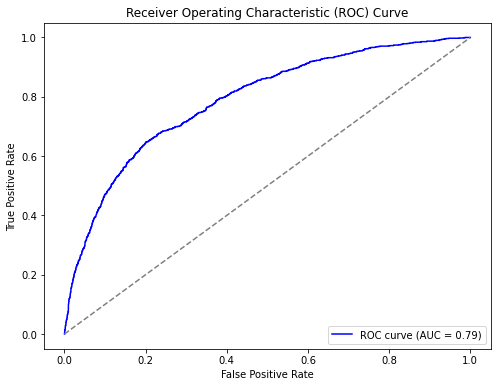

In [35]:
# plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Interpreting the Tuned Model 

1. A better ROC-AUC score indicates an improvement in the model's ability to predict between the two classses

2. Optimizing regularization including propoer tuning of c reduces overfitting on the training data.

3. Tuning the model improves the perfomance of the predictive model

## DECISIONTREECLASSIFIER


In [36]:
#Instantiating and fitting the classifier
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)


dt_model.fit(X_train_balanced, y_train_balanced)



DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [37]:
# Predicting using the classifier
y_pred = dt_model.predict(X_test)


In [39]:
# Evaluating the model 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.73
Precision: 0.37
Recall: 0.38
F1 Score: 0.37

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      4212
         1.0       0.37      0.38      0.37      1130

    accuracy                           0.73      5342
   macro avg       0.60      0.60      0.60      5342
weighted avg       0.73      0.73      0.73      5342



The logistic Regression model predicts the h1n1_vaccine possibility better than the decisiontreeclassifier although there is room for improvement. The Logistic Regression model predicts the type of vaccine effectively. 